# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


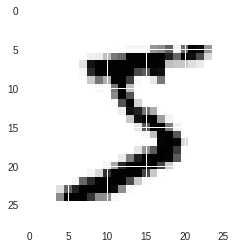

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28,28,1), name='conv2d_1'))
model.add(Conv2D(10, (3,3), name='conv2d_3'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [199]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 10)        2890      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 11, 11, 10)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 11, 11, 10)        0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 1210)              0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 1210)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 10)                12110     
Total para

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])

In [214]:
history = model.fit(X_train, Y_train, batch_size=200, epochs=50, verbose=1)

Epoch 1/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.0285 - acc: 0.9906
Epoch 2/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.0274 - acc: 0.9913
Epoch 3/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.0283 - acc: 0.9903
Epoch 4/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.0277 - acc: 0.9903
Epoch 5/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.0291 - acc: 0.9901
Epoch 6/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.0284 - acc: 0.9906
Epoch 7/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.0276 - acc: 0.9909
Epoch 8/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.0284 - acc: 0.9906
Epoch 9/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.0292 - acc: 0.9903
Epoch 10/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.0276 - acc: 0.9906

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [221]:
print(score)

print("Test Loss %s"%score[0])
print("Test Accuracy %s"%(score[1]))


[0.02234255842317325, 0.9924]
Test Loss 0.02234255842317325
Test Accuracy 0.9924


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[2.3495966e-06 1.0541997e-09 1.8009272e-05 3.7394366e-03 1.4230692e-08
  1.5137353e-05 7.1884790e-11 9.9615139e-01 1.1423729e-06 7.2487099e-05]
 [3.2965161e-03 1.4903025e-05 9.8420030e-01 1.1269612e-03 1.0076540e-10
  2.1998018e-03 7.6268637e-03 1.0002882e-12 1.5347390e-03 6.1351035e-10]
 [3.2555040e-06 9.8882651e-01 5.3820885e-03 6.5238768e-04 8.9756242e-04
  8.5573745e-05 3.7933741e-04 3.1346865e-03 6.2264223e-04 1.5904032e-05]
 [9.9984324e-01 2.5096441e-11 2.8614722e-05 5.8413900e-07 2.2340949e-08
  1.7105283e-05 9.5546275e-05 6.1051455e-06 3.8252056e-06 4.9125424e-06]
 [9.1548696e-05 1.3143838e-07 3.4996898e-05 1.0270422e-05 9.9387324e-01
  8.3596897e-06 7.7484008e-05 4.4673879e-04 1.2556557e-04 5.3315978e-03]
 [1.6769513e-06 9.8993582e-01 1.0952689e-03 3.8195658e-04 6.0212164e-04
  1.3218289e-05 2.8043572e-05 6.1246147e-03 1.7427455e-03 7.4631891e-05]
 [1.1790677e-06 6.3950495e-07 2.7476074e-06 3.3675256e-05 9.8692167e-01
  3.0401582e-04 4.0974496e-06 1.0690719e-03 9.7172130e-03 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

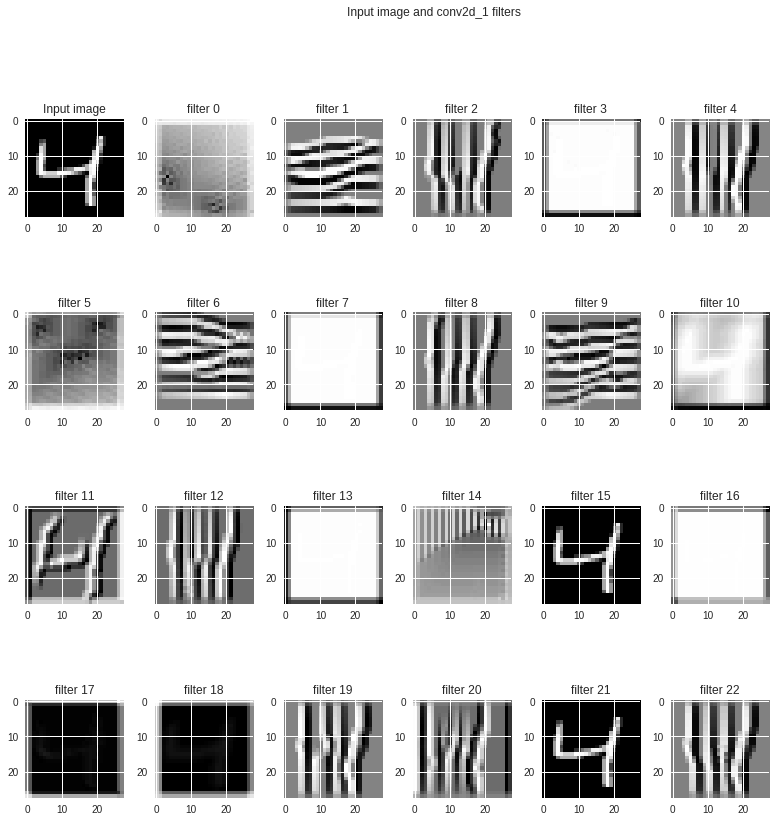

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()